<a href="https://colab.research.google.com/github/trabelsi-mohamed-amine/machine-learning-cardiovascular/blob/main/machine-learning-cardiovascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/heart_data.csv")
df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [ ]:
df.dtypes


,0
index,int64
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64


In [ ]:
df.isnull().sum()


,0
index,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0


<Axes: >

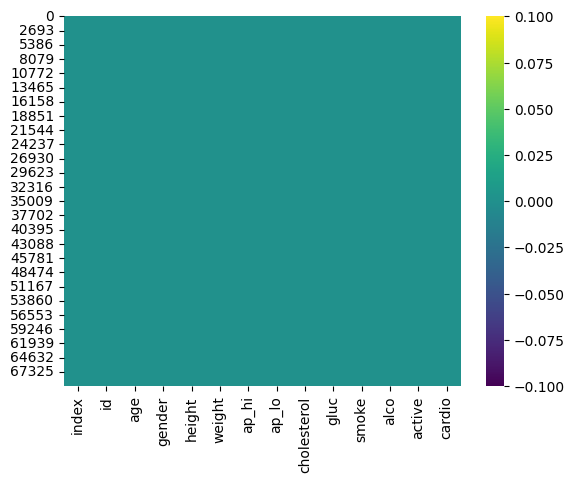

In [ ]:
#any null value will be visible (distinct)
sns.heatmap(df.isnull(), cmap = 'viridis')


In [ ]:
df.size


980000

In [ ]:
df.shape
#rows, columns

(70000, 14)

In [ ]:
df.columns


Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
df.duplicated().sum()


0

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
index,70000.0,34999.500000,20207.403759,0.0,17499.75,34999.5,52499.25,69999.0
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0


In [ ]:
df.drop(['index', 'id'], axis = 1, inplace = True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
#age is in days
#converting to years
df['age'] = df['age'].apply(lambda x : int(x/365))


In [ ]:
df['age']


,age
0,50
1,55
2,51
3,48
4,47
...,...
69995,52
69996,61
69997,52
69998,61


In [ ]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
#Correlation between columns
df_corr = df.corr()
df_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029756,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [ ]:
#afficher 1 partie puisque elle est répetetive
mask = np.triu(df_corr)


<Axes: title={'center': 'Correlation Matrix'}>

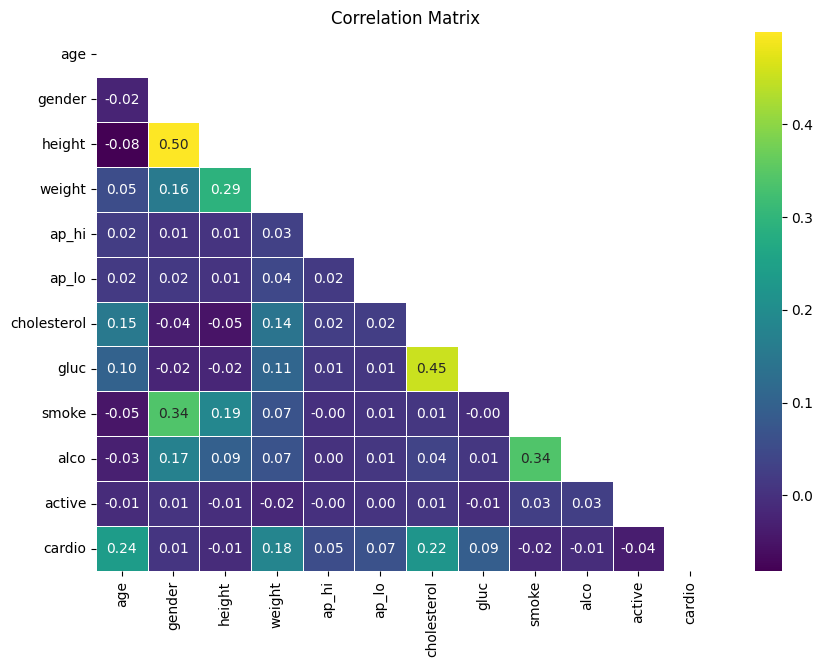

In [ ]:
#Matrice de correlation
plt.figure(figsize = (10, 7))
plt.title("Correlation Matrix")
sns.heatmap(df_corr, cmap = 'viridis', annot = True, mask = mask, linecolor = 'white', linewidth = 0.5, fmt = '.2f')

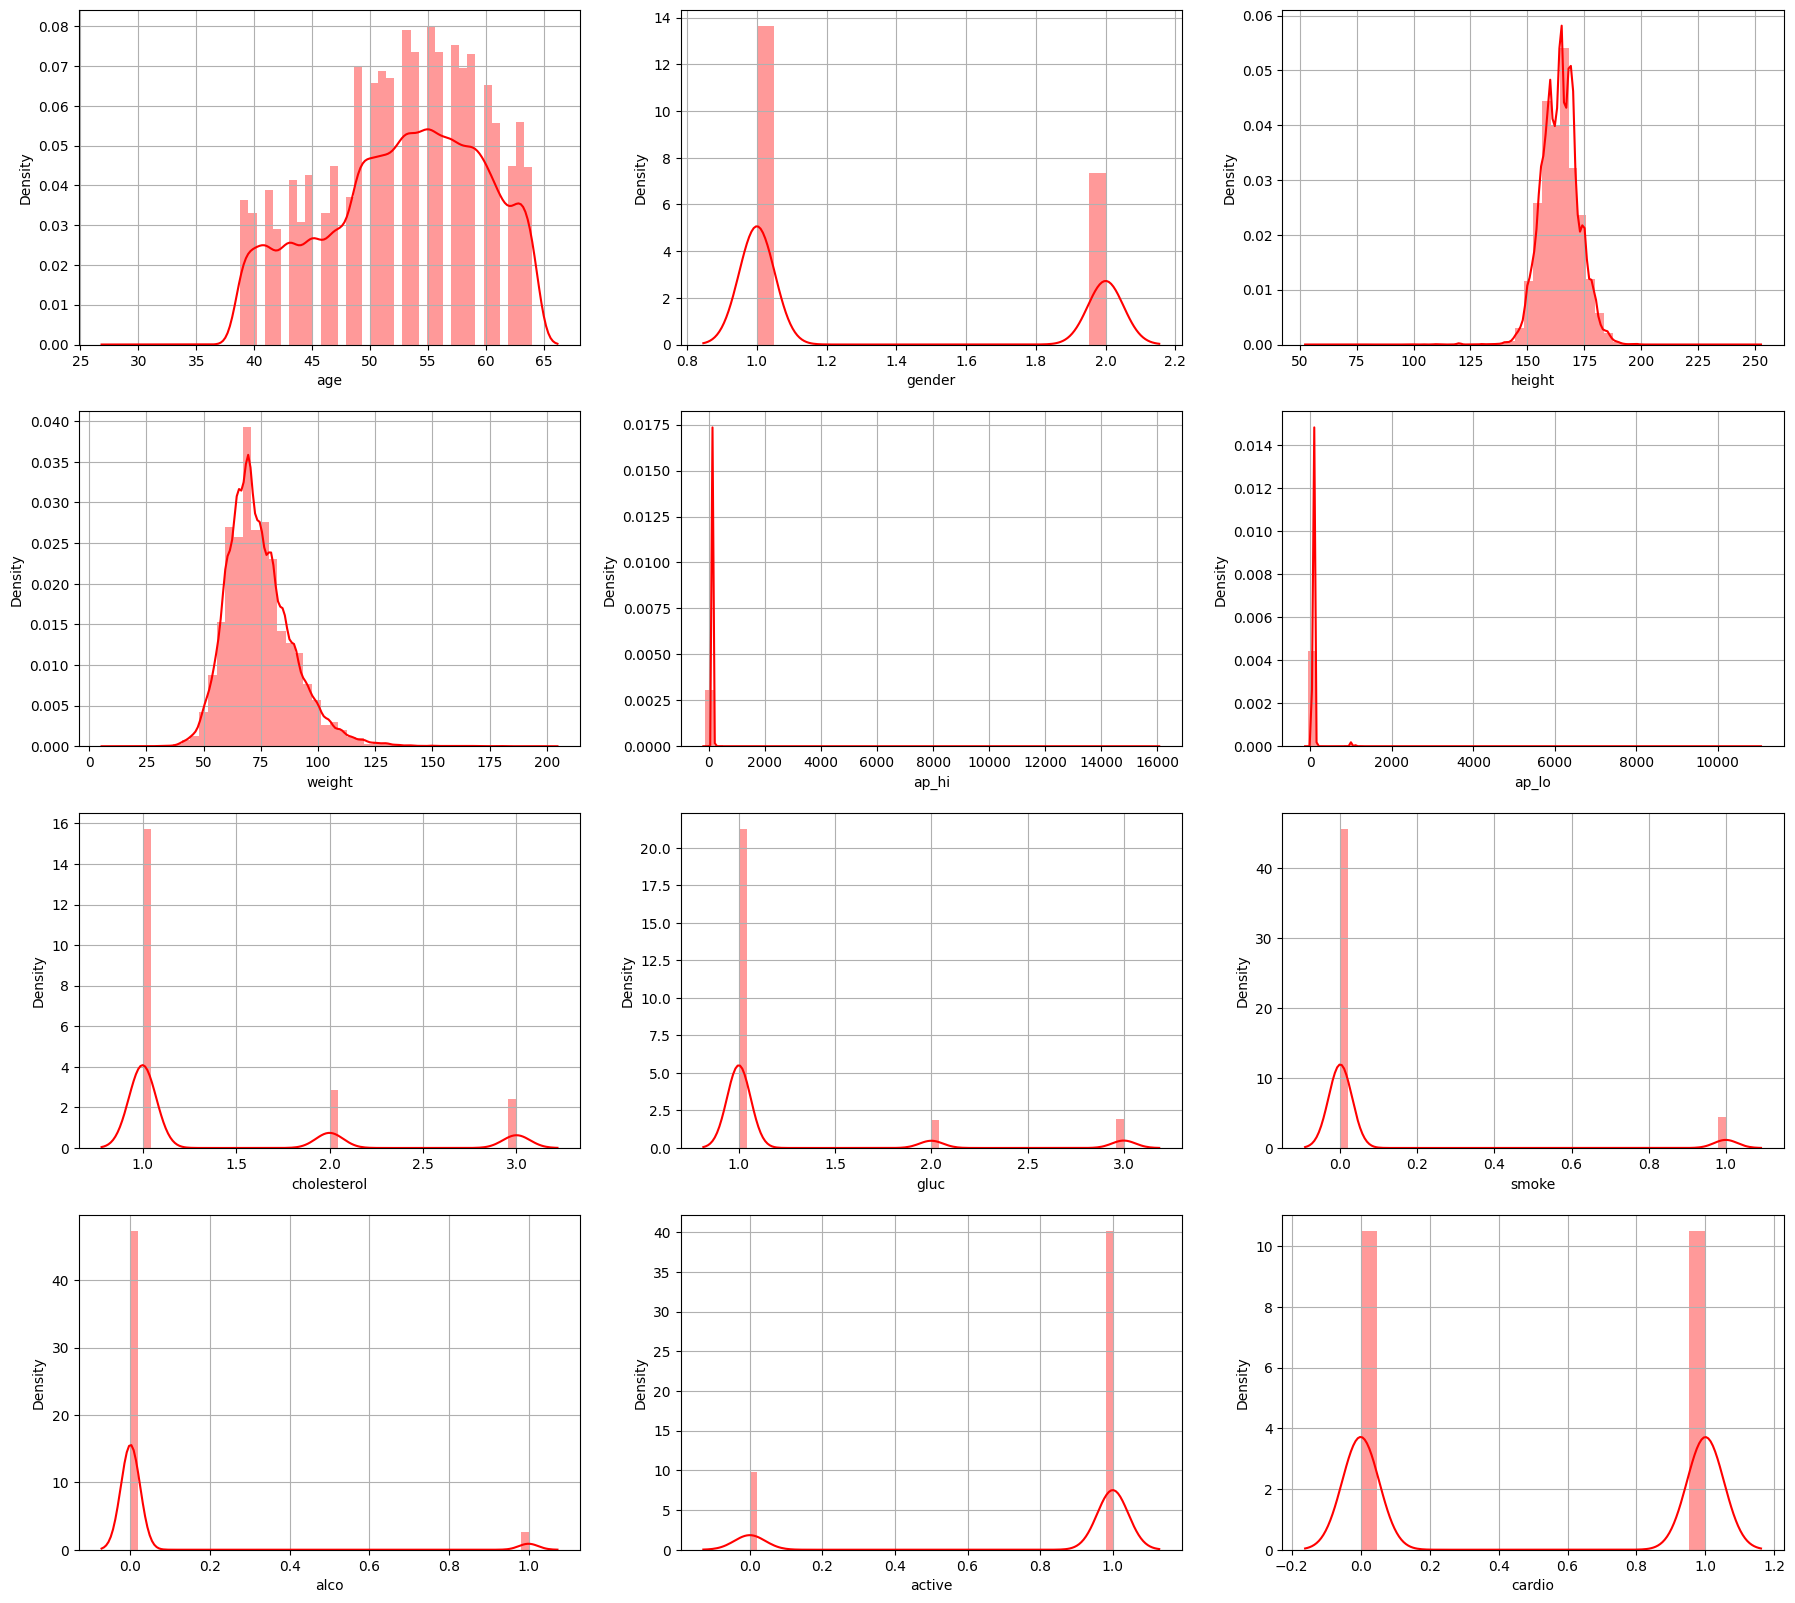

In [ ]:
plt.figure(figsize = (22, 20))

for i in range(len(df.columns)):
    plt.subplot(4, 3, i+1)
    sns.distplot(df.iloc[:, i], color = 'red')
    plt.grid()

<Axes: >

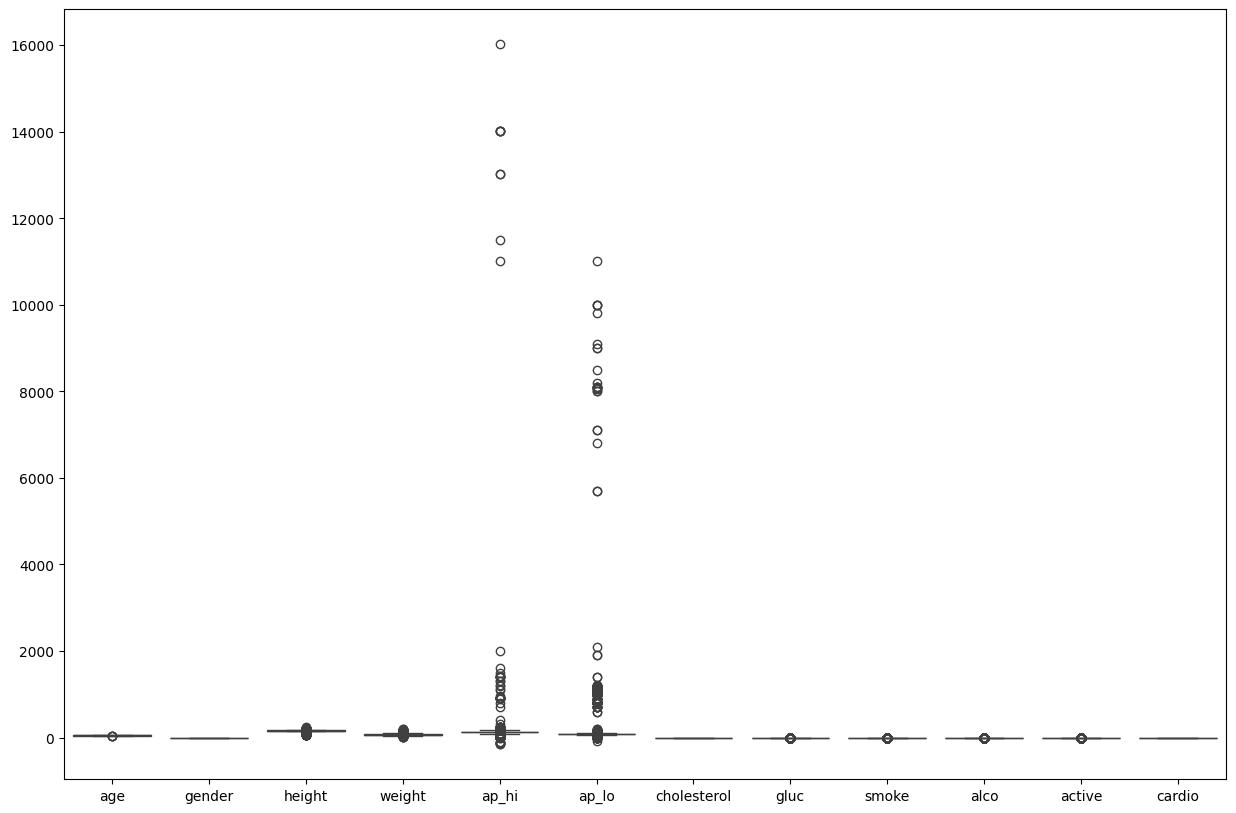

In [ ]:
#Boite moustache pour chaque column
plt.figure(figsize = (15, 10))
sns.boxplot(df)

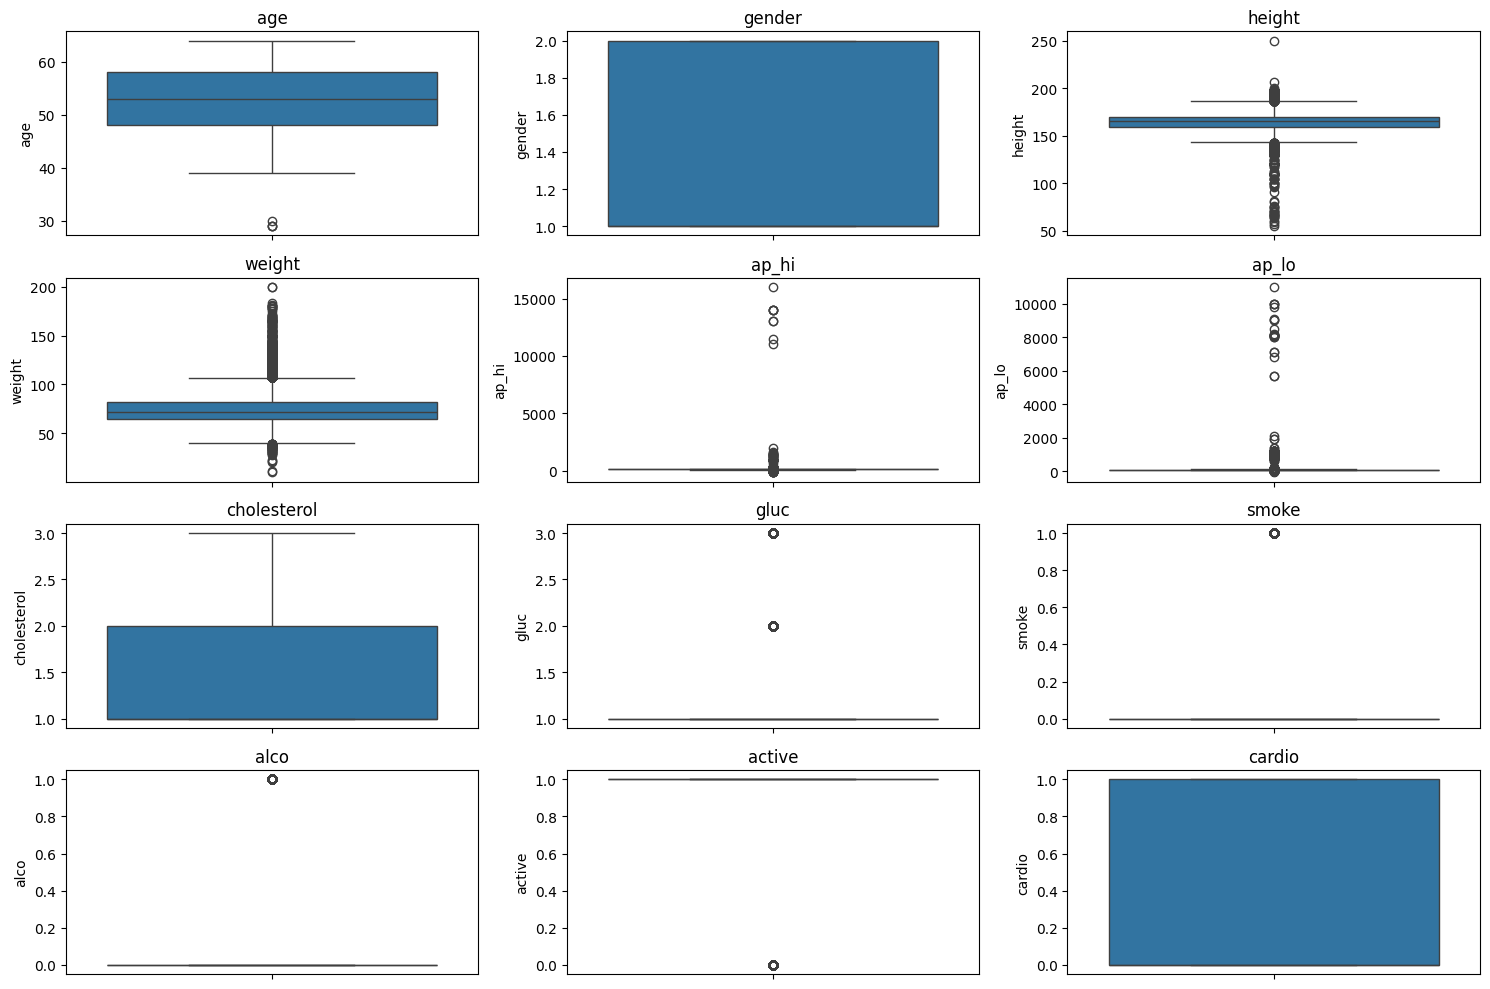

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

def count_impossible_values(df):
    invalid_counts = {}

    # Age: <30 or >120
    invalid_counts['age'] = df[(df['age'] < 0) | (df['age'] > 120)].shape[0]

    # Height: <130 or >220 cm
    invalid_counts['height'] = df[(df['height'] < 130) | (df['height'] > 220)].shape[0]

    # Weight: <5 or >200 kg
    invalid_counts['weight'] = df[(df['weight'] < 30) | (df['weight'] > 200)].shape[0]

    # Systolic blood pressure: <90 or >250
    invalid_counts['ap_hi'] = df[(df['ap_hi'] < 90) | (df['ap_hi'] > 250)].shape[0]

    # Diastolic blood pressure: <60 or >200
    invalid_counts['ap_lo'] = df[(df['ap_lo'] < 60) | (df['ap_lo'] > 200)].shape[0]

    # Logical error: ap_lo > ap_hi
    invalid_counts['ap_lo > ap_hi'] = df[df['ap_lo'] > df['ap_hi']].shape[0]

    # Cholesterol: valid range 1 to 5 (0 is invalid)
    invalid_counts['cholesterol'] = df[~df['cholesterol'].between(1, 5)].shape[0]

    # Glucose: valid range 1 to 16
    invalid_counts['gluc'] = df[~df['gluc'].between(1, 16)].shape[0]

    # Gender: only 1 or 2
    invalid_counts['gender'] = df[~df['gender'].isin([1, 2])].shape[0]

    # Binary columns: only 0 or 1
    for col in ['smoke', 'alco', 'active', 'cardio']:
        invalid_counts[col] = df[~df[col].isin([0, 1])].shape[0]

    return pd.Series(invalid_counts).sort_values(ascending=False)

invalid_summary = count_impossible_values(df)
print(invalid_summary)


ap_lo > ap_hi    1234
ap_lo            1128
ap_hi             361
height             93
age                 0
weight              0
cholesterol         0
gluc                0
gender              0
smoke               0
alco                0
active              0
cardio              0
dtype: int64


In [ ]:
def remove_impossible_values(df):
    df_filtered = df[
        (df['age'] >= 0) & (df['age'] <= 120) &
        (df['height'] >= 130) & (df['height'] <= 220) &
        (df['weight'] >= 5) & (df['weight'] <= 150) &
        (df['ap_hi'] >= 90) & (df['ap_hi'] <= 200) &
        (df['ap_lo'] >= 60) & (df['ap_lo'] <= 140) &
        (df['ap_lo'] <= df['ap_hi']) &
        (df['cholesterol'].between(1, 5)) &
        (df['gluc'].between(1, 16)) &
        (df['gender'].isin([1, 2])) &
        (df['smoke'].isin([0, 1])) &
        (df['alco'].isin([0, 1])) &
        (df['active'].isin([0, 1])) &
        (df['cardio'].isin([0, 1]))
    ]
    return df_filtered
df = remove_impossible_values(df)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


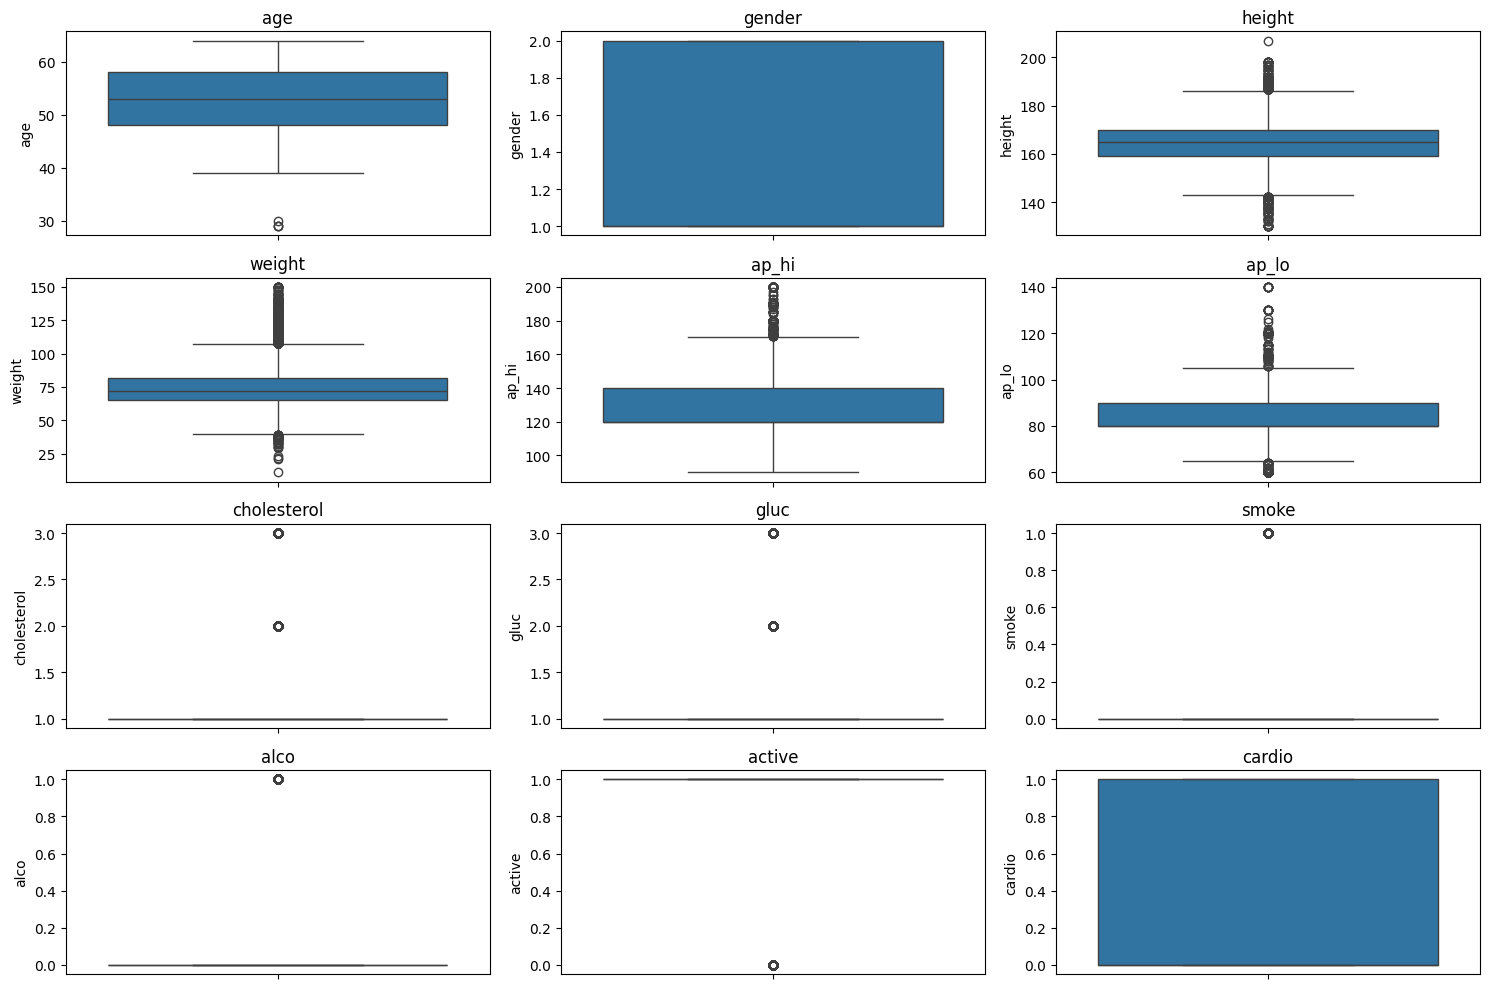

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
df['cardio'].value_counts()


,count
cardio,
0,34502
1,33805


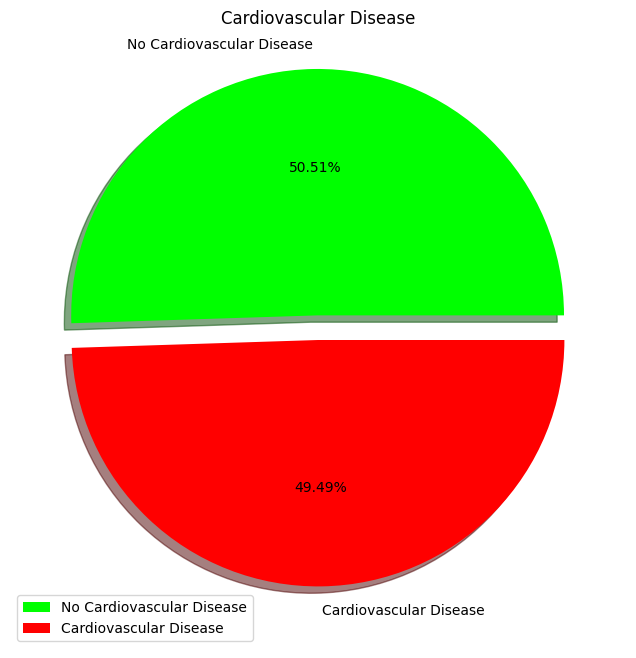

In [ ]:
plt.figure(figsize = (10, 8))
plt.title('Cardiovascular Disease')
plt.pie(df['cardio'].value_counts(), labels = ['No Cardiovascular Disease', 'Cardiovascular Disease'], explode = (0.1, 0.0), colors = ['lime', 'red'],autopct = '%1.2f%%', shadow = True)
plt.legend(loc = 'best')

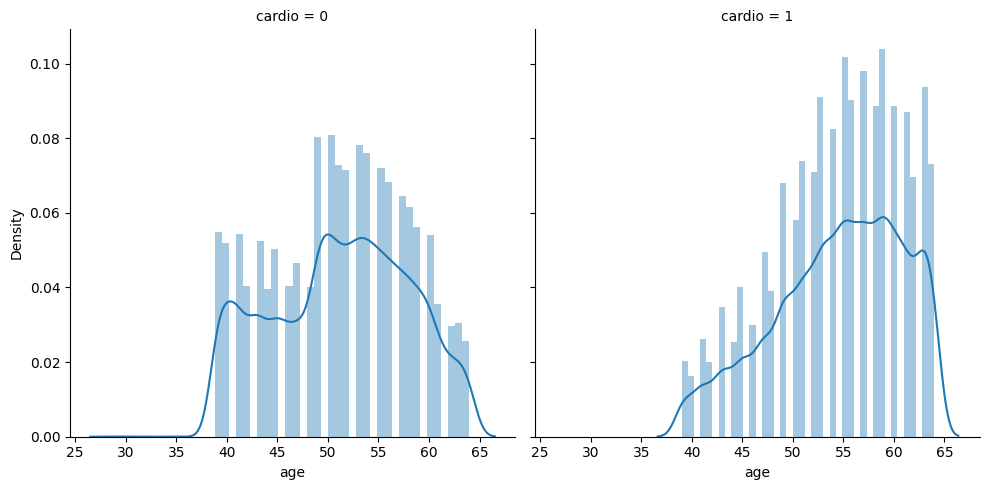

In [ ]:
#Densité d'age par rapport disease
sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "age")

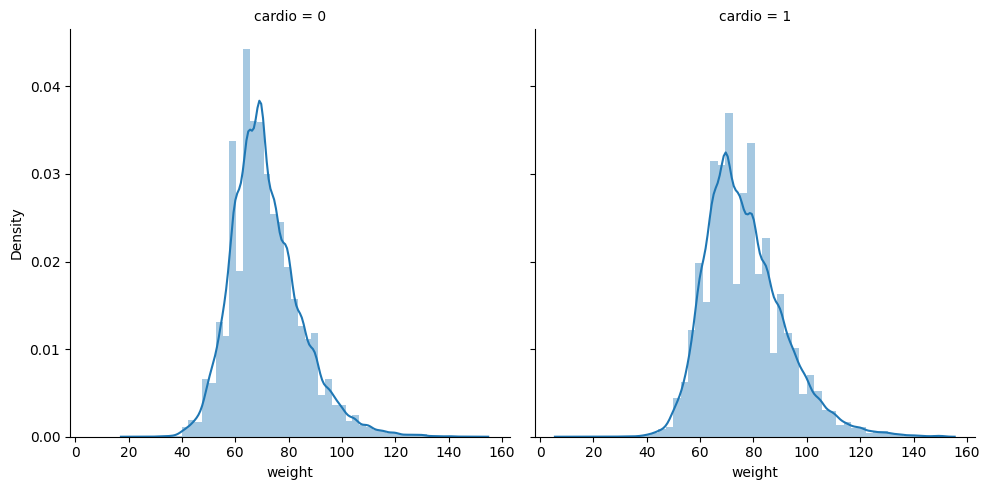

In [ ]:
#Densité de poids par rapport disease


sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "weight")

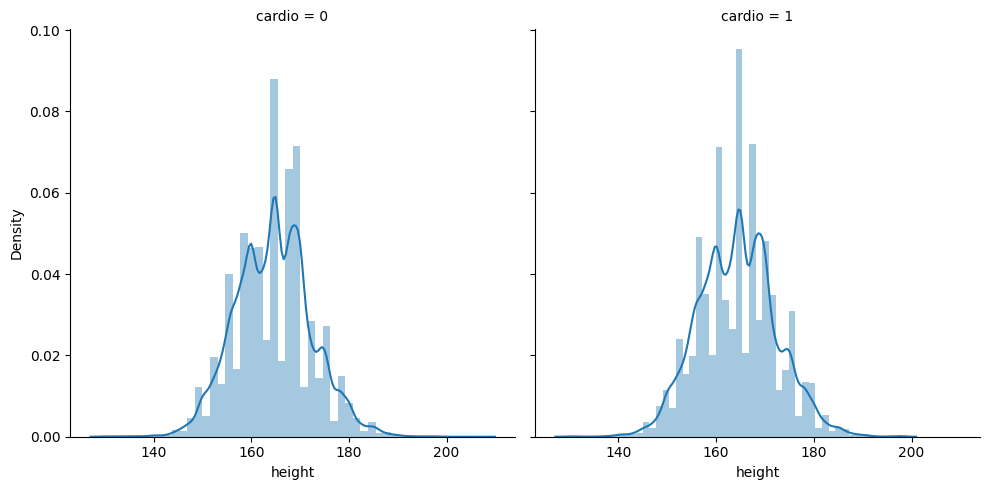

In [ ]:
#Densité d'hauteur par rapport disease

sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "height")

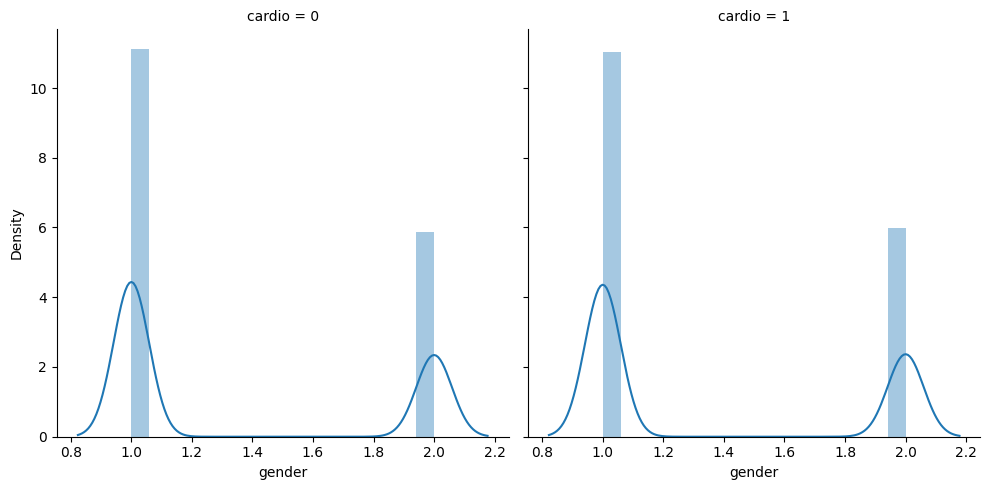

In [ ]:
#Densité de sexe par rapport disease

sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "gender")

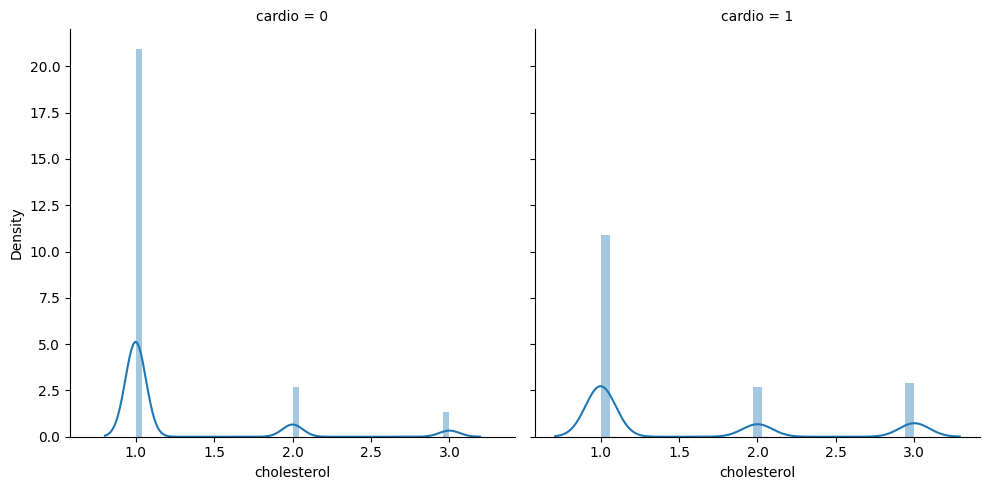

In [ ]:
#Densité de cholestrol par rapport disease

sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "cholesterol")


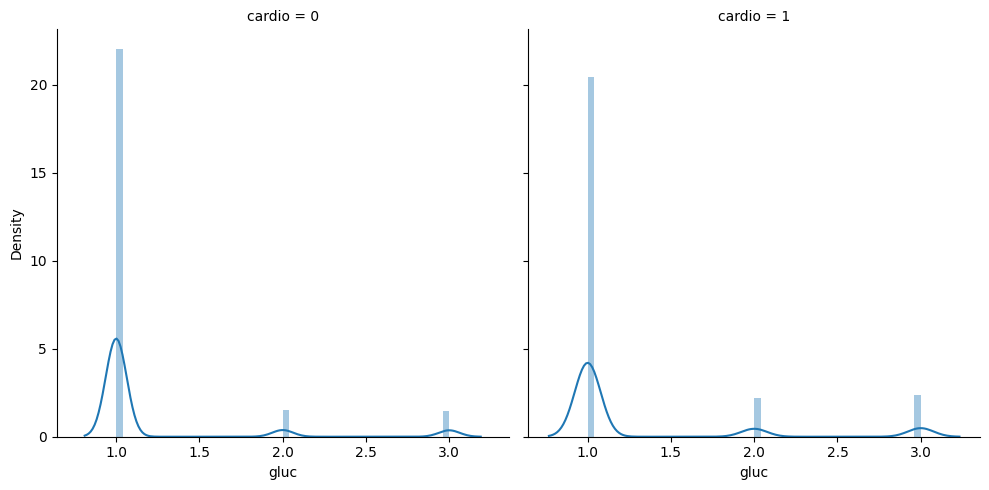

In [ ]:
#Densité de niveax de glucose par rapport disease


sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "gluc")

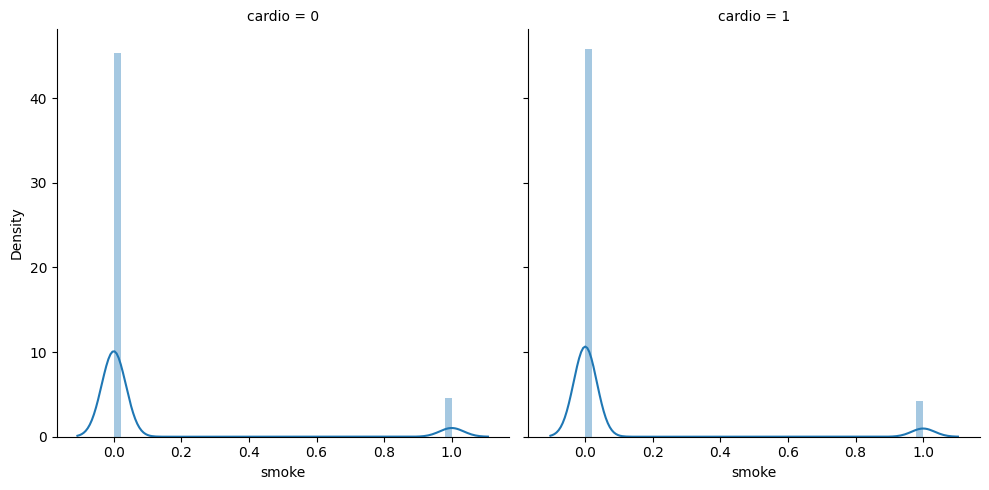

In [ ]:
#Desnité des personne fumeur par rapport disease
sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "smoke")

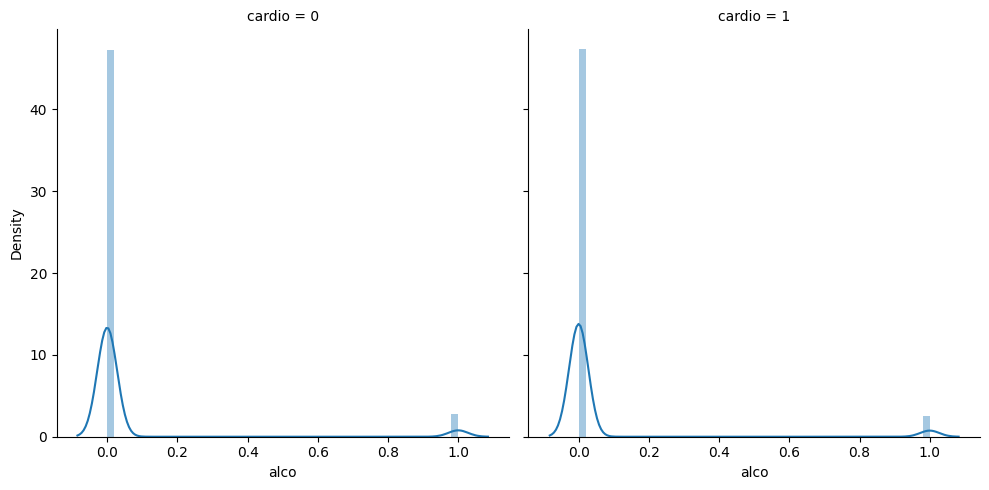

In [ ]:
#Desnité des personne alcoholic par rapport disease

sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "alco")

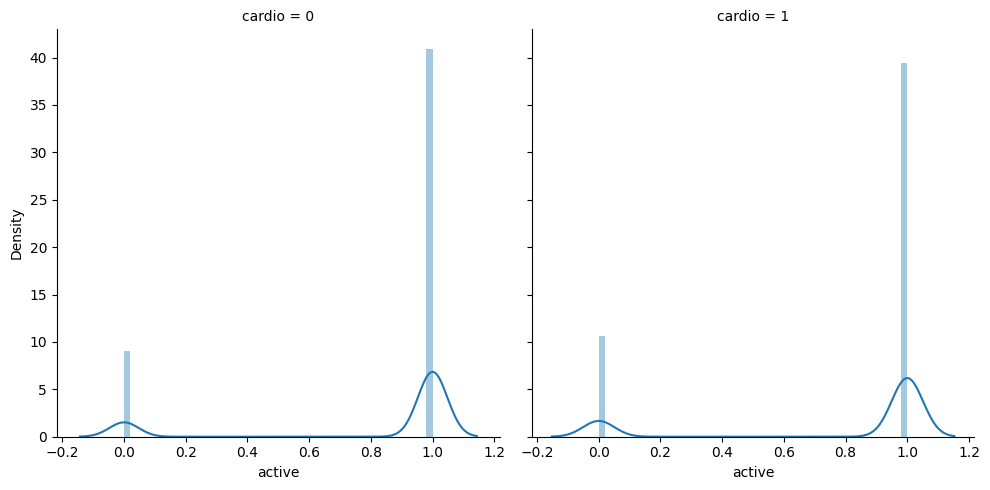

In [ ]:
#Desnité des personne active par rapport disease

sea = sns.FacetGrid(data = df, col = "cardio", height = 5)
sea.map(sns.distplot, "active")

# Training set, removal of **cardio**

In [ ]:
x = df[df.columns.drop(['cardio'])].values
x

array([[ 50.,   2., 168., ...,   0.,   0.,   1.],
       [ 55.,   1., 156., ...,   0.,   0.,   1.],
       [ 51.,   1., 165., ...,   0.,   0.,   0.],
       ...,
       [ 52.,   2., 183., ...,   0.,   1.,   0.],
       [ 61.,   1., 163., ...,   0.,   0.,   0.],
       [ 56.,   1., 170., ...,   0.,   0.,   1.]])

# Cardio **values**

In [ ]:
y = df.iloc[:, -1].values
y

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)


In [ ]:
#Fonction pour mesurer performance
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred)) #case when predecting 1 and its 1  Precision = True Positives / (True Positives + False Positives)
    print("Recall : ", recall_score(y_test, y_pred)) #Recall = True Positives / (True Positives + False Negatives)
    print("Accuracy : ", accuracy_score(y_test, y_pred)) #Overall correctness.
    print("F1 Score : ", f1_score(y_test, y_pred)) #F1 = 2 × (Precision × Recall) / (Precision + Recall)
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No Cardiovascular Disease', 'Cardiovascular Disease'])
    cm.plot()

# **Classification Bayes naïf gaussien**


In [ ]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = model_nb.predict(x_test)


Precision :  0.7638837353123067
Recall :  0.6031839046781913
Accuracy :  0.7085834187283463
F1 Score :  0.6740886269373499

 [[8345 1909]
 [4063 6176]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.67      0.81      0.74     10254
           1       0.76      0.60      0.67     10239

    accuracy                           0.71     20493
   macro avg       0.72      0.71      0.71     20493
weighted avg       0.72      0.71      0.71     20493

******************************************************



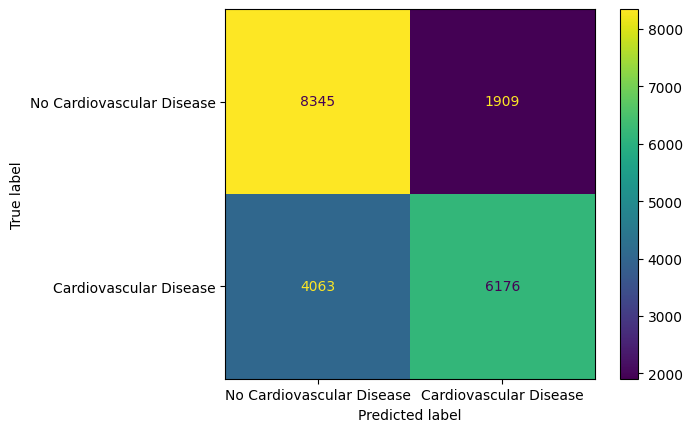

In [ ]:
perform(y_pred_nb)


# **KNN**

Precision :  0.7191802753762407
Recall :  0.43871471823420255
Accuracy :  0.6339725760015615
F1 Score :  0.5449802851076736

 [[8500 1754]
 [5747 4492]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.60      0.83      0.69     10254
           1       0.72      0.44      0.54     10239

    accuracy                           0.63     20493
   macro avg       0.66      0.63      0.62     20493
weighted avg       0.66      0.63      0.62     20493

******************************************************



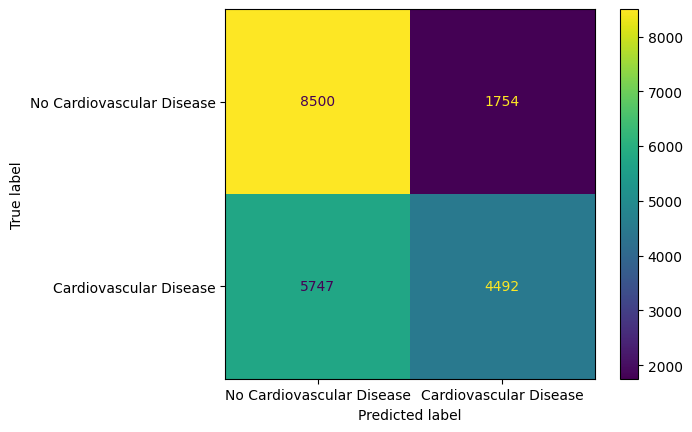

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)

perform(y_pred_knn)


# **Classification Logistique**

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model_lr.predict(x_test)


Precision :  0.7373452096458831
Recall :  0.6629553667350327
Accuracy :  0.7136095252037281
F1 Score :  0.6981743378760606

 [[7836 2418]
 [3451 6788]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.69      0.76      0.73     10254
           1       0.74      0.66      0.70     10239

    accuracy                           0.71     20493
   macro avg       0.72      0.71      0.71     20493
weighted avg       0.72      0.71      0.71     20493

******************************************************



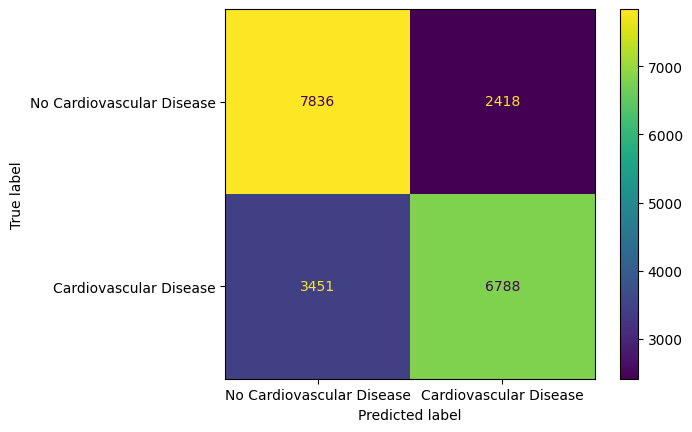

In [ ]:
perform(y_pred_lr)


# **XGBoost Classifier**

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(x_test)


Precision :  0.7526349752634975
Recall :  0.683465182146694
Accuracy :  0.7296149904845557
F1 Score :  0.7163842964631213

 [[7954 2300]
 [3241 6998]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10254
           1       0.75      0.68      0.72     10239

    accuracy                           0.73     20493
   macro avg       0.73      0.73      0.73     20493
weighted avg       0.73      0.73      0.73     20493

******************************************************



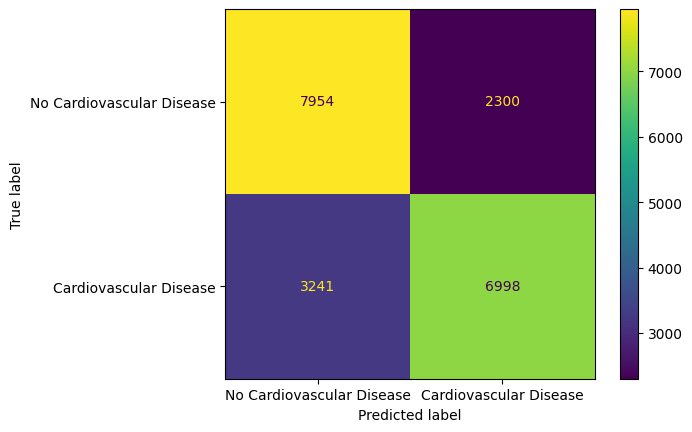

In [ ]:
perform(y_pred_xgb)


# **Decision Tree**

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = model_dt.predict(x_test)

Precision :  0.6353001017293998
Recall :  0.6099228440277371
Accuracy :  0.6301663982823403
F1 Score :  0.6223528825551846

 [[6669 3585]
 [3994 6245]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.63      0.65      0.64     10254
           1       0.64      0.61      0.62     10239

    accuracy                           0.63     20493
   macro avg       0.63      0.63      0.63     20493
weighted avg       0.63      0.63      0.63     20493

******************************************************



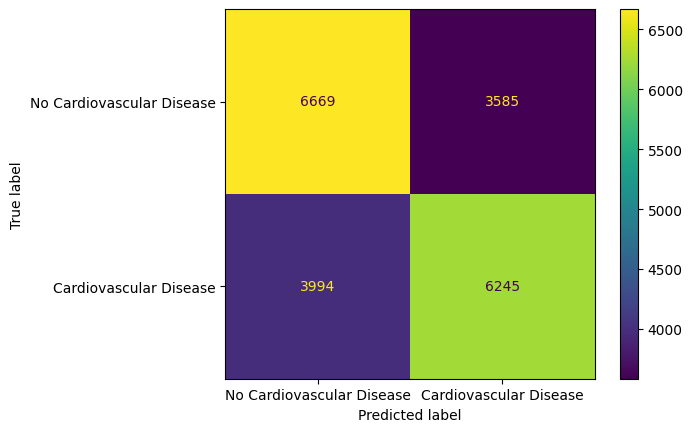

In [ ]:
perform(y_pred_dt)



# **Random Forest**

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = model_rf.predict(x_test)


Precision :  0.7131735921544838
Recall :  0.6889344662564704
Accuracy :  0.706143561216025
F1 Score :  0.7008445106805763

 [[7417 2837]
 [3185 7054]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.70      0.72      0.71     10254
           1       0.71      0.69      0.70     10239

    accuracy                           0.71     20493
   macro avg       0.71      0.71      0.71     20493
weighted avg       0.71      0.71      0.71     20493

******************************************************



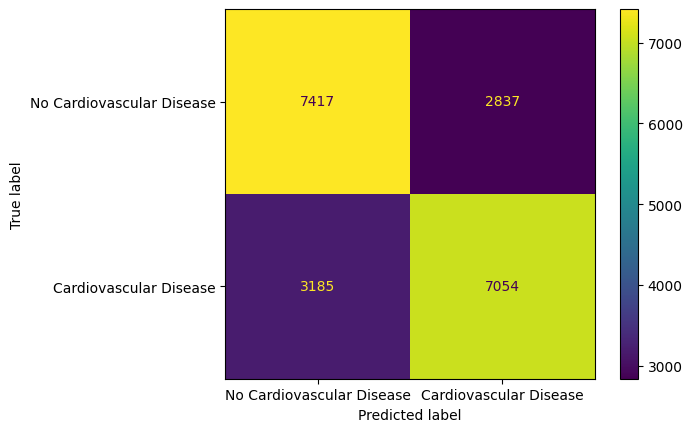

In [ ]:
perform(y_pred_rf)


# **Extra Trees Classifier**

In [ ]:
model_etc = ExtraTreesClassifier()
model_etc.fit(x_train, y_train)

ExtraTreesClassifier()

In [ ]:
y_pred_etc = model_etc.predict(x_test)


Precision :  0.6985545071270829
Recall :  0.6796562164273855
Accuracy :  0.6934075050017079
F1 Score :  0.6889757932775605

 [[7251 3003]
 [3280 6959]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.69      0.71      0.70     10254
           1       0.70      0.68      0.69     10239

    accuracy                           0.69     20493
   macro avg       0.69      0.69      0.69     20493
weighted avg       0.69      0.69      0.69     20493

******************************************************



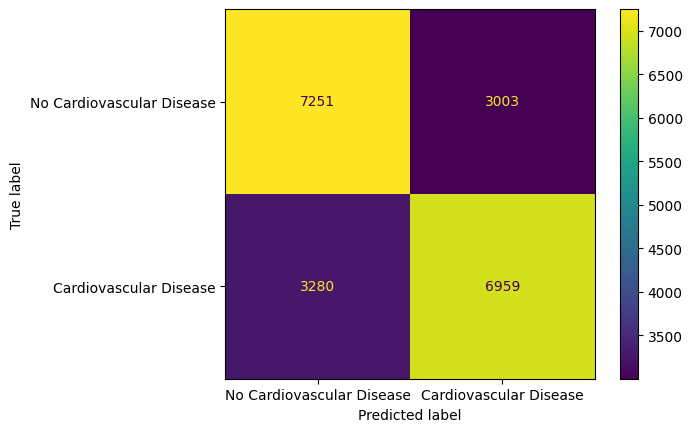

In [ ]:
perform(y_pred_etc)


# **Support Vector Classifier**


In [ ]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_svc = model_svc.predict(x_test)


Precision :  0.7773709264005859
Recall :  0.6220334016993847
Accuracy :  0.7221490264968525
F1 Score :  0.6910807291666666

 [[8430 1824]
 [3870 6369]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.69      0.82      0.75     10254
           1       0.78      0.62      0.69     10239

    accuracy                           0.72     20493
   macro avg       0.73      0.72      0.72     20493
weighted avg       0.73      0.72      0.72     20493

******************************************************



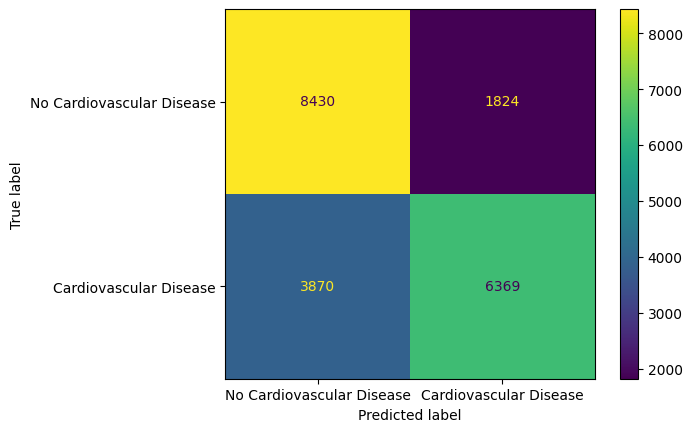

In [ ]:
perform(y_pred_svc)


# **Multi-Layer Perceptron**

In [ ]:
model_mlp = MLPClassifier(hidden_layer_sizes=(500))
model_mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=500)

In [ ]:
y_pred_mlp = model_mlp.predict(x_test)

Precision :  0.6444921846062671
Recall :  0.849692352768825
Accuracy :  0.6907236617381545
F1 Score :  0.7330019378212149

 [[5455 4799]
 [1539 8700]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.78      0.53      0.63     10254
           1       0.64      0.85      0.73     10239

    accuracy                           0.69     20493
   macro avg       0.71      0.69      0.68     20493
weighted avg       0.71      0.69      0.68     20493

******************************************************



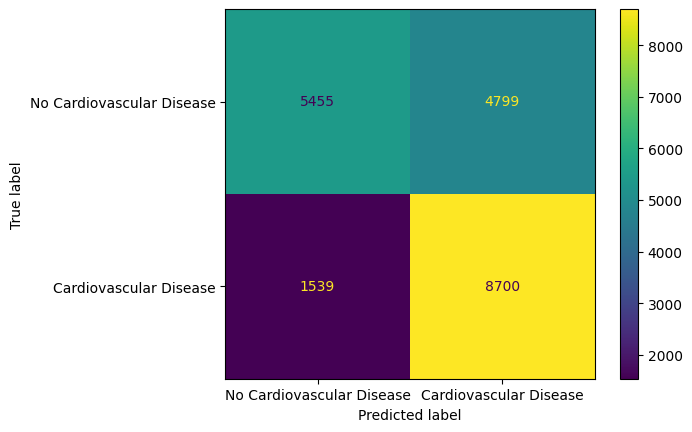

In [ ]:
perform(y_pred_mlp)


# **Light GBM Classifier** (Light Gradient Boosting Machine)

In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 23566, number of negative: 24248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 47814, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492868 -> initscore=-0.028529
[LightGBM] [Info] Start training from score -0.028529


LGBMClassifier()

In [ ]:
y_pred_lgbm = model_lgbm.predict(x_test)


Precision :  0.7571015114160146
Recall :  0.6898134583455415
Accuracy :  0.7344459083589518
F1 Score :  0.7218928863450531

 [[7988 2266]
 [3176 7063]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10254
           1       0.76      0.69      0.72     10239

    accuracy                           0.73     20493
   macro avg       0.74      0.73      0.73     20493
weighted avg       0.74      0.73      0.73     20493

******************************************************



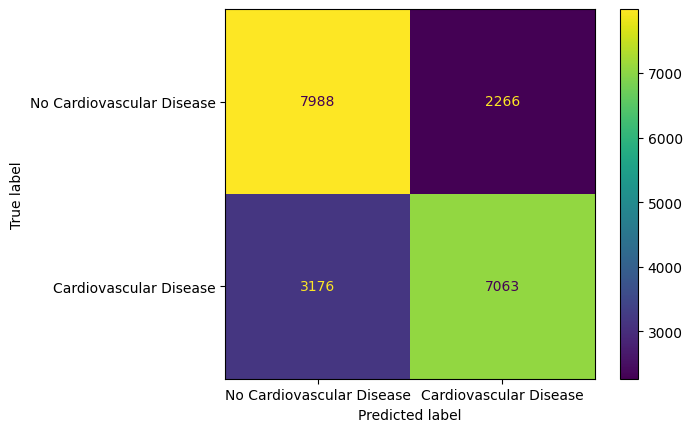

In [ ]:
perform(y_pred_lgbm)


# **Precision-Recall Curve**

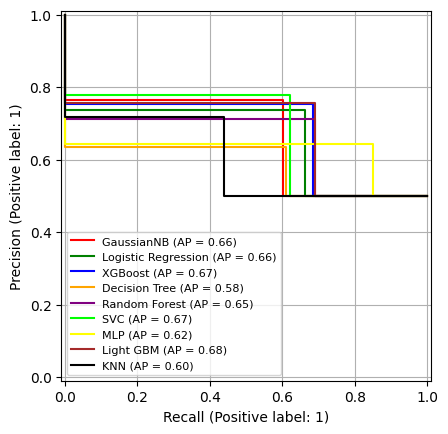

In [ ]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nb, name = 'GaussianNB', ax = ax, color = 'red')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, name = 'Logistic Regression', ax = ax, color = 'green')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, name = 'XGBoost', ax = ax, color = 'blue')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dt, name = 'Decision Tree', ax = ax, color = 'orange')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, name = 'Random Forest', ax = ax, color = 'purple')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, name = 'SVC', ax = ax, color = 'lime')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mlp, name = 'MLP', ax = ax, color = 'yellow')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lgbm, name = 'Light GBM', ax = ax, color = 'brown')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_knn, name = 'KNN', ax = ax, color = 'black')

plt.grid()
plt.legend(fontsize = 8, loc = 'best')

# **ROC Curve**

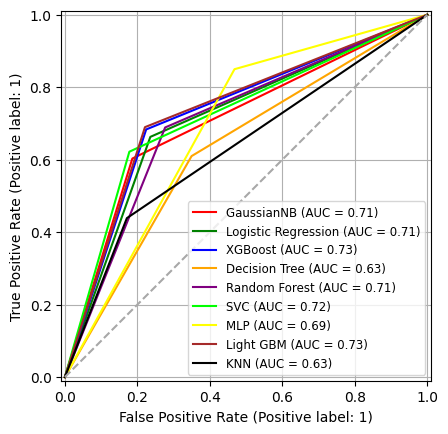

In [ ]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, y_pred_nb, name = 'GaussianNB', ax = ax, color = 'red')
RocCurveDisplay.from_predictions(y_test, y_pred_lr, name = 'Logistic Regression', ax = ax, color = 'green')
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, name = 'XGBoost', ax = ax, color = 'blue')
RocCurveDisplay.from_predictions(y_test, y_pred_dt, name = 'Decision Tree', ax = ax, color = 'orange')
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name = 'Random Forest', ax = ax, color = 'purple')
RocCurveDisplay.from_predictions(y_test, y_pred_svc, name = 'SVC', ax = ax, color = 'lime')
RocCurveDisplay.from_predictions(y_test, y_pred_mlp, name = 'MLP', ax = ax, color = 'yellow')
RocCurveDisplay.from_predictions(y_test, y_pred_lgbm, name = 'Light GBM', ax = ax, color = 'brown')
RocCurveDisplay.from_predictions(y_test, y_pred_knn, name = 'KNN', ax = ax, color = 'black')
plt.plot([0, 1], [0, 1], linestyle = "--", color = '#A8A8A8')
plt.grid()
plt.legend(fontsize = 8.5, loc = 'best')